In [349]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [350]:
# To calculate some data points that have to do with dates
import datetime as dt

In [351]:
import pandas as pd
import matplotlib.pyplot as plt

In [352]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [353]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [354]:
columns = inspector.get_columns("measurement")
for column_name in columns:
    print(column_name["name"], column_name["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [355]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

###### D1: Determine the Summary Statistics for June

In [356]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
measurement_June = []
measurement_June = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == "06")

In [357]:
#  3. Convert the June temperatures to a list.
temps_June = list(measurement_June)

In [358]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_June_df=pd.DataFrame(temps_June, columns = ['date', 'June Temps'])
temps_June_df.tail()

,date,June Temps
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0
1699,2017-06-30,75.0


In [359]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_June_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:>

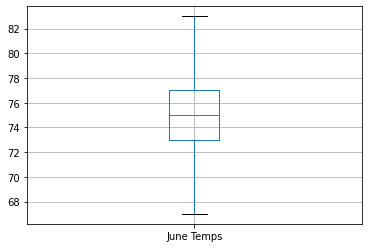

In [360]:
# Boxplot without outliers
temps_June_df.boxplot(column='June Temps', sym='')

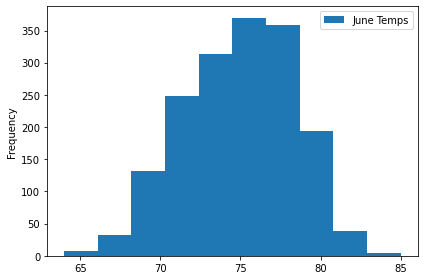

In [394]:
temps_June_df.plot.hist(bins=10)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [362]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
measurement_December = []
measurement_December = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == "12")

In [363]:
# 7. Convert the December temperatures to a list.
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temps_December = list(measurement_December)

In [364]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temps_December_df=pd.DataFrame(temps_December, columns = ['date', 'December Temps'])
temps_December_df.tail()

,date,December Temps
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0
1516,2016-12-31,65.0


In [365]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temps_December_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:>

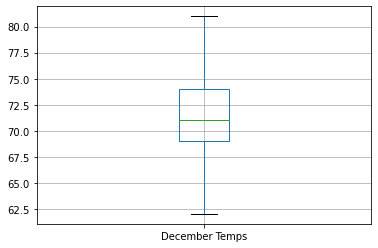

In [366]:
# Boxplot without outliers
temps_December_df.boxplot(column='December Temps', sym='')

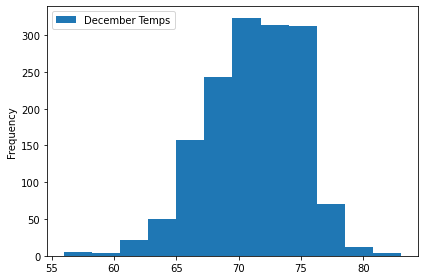

In [393]:
temps_December_df.plot.hist(bins=12)
plt.tight_layout()

## D3: The key differences in weather between June and December and two recommendations for further analysis

In [368]:
temps_Jun_Dec_df = pd.merge(temps_June_df, temps_December_df, how="outer", on=["date", "date"])
temps_Jun_Dec_df.describe()

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


<AxesSubplot:>

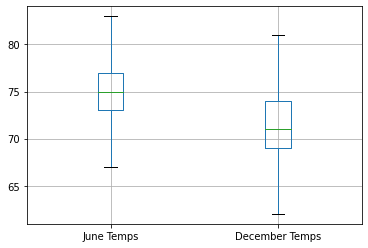

In [369]:
temps_Jun_Dec_df.boxplot(column=['June Temps', 'December Temps'], sym='')

In [389]:
temps_Jun_Dec_df.set_index(temps_Jun_Dec_df['date'],inplace=True)
temps_Jun_Dec_df.sort_index()

,date,June Temps,December Temps
date,,,
2010-06-01,2010-06-01,78.0,NaN
2010-06-01,2010-06-01,74.0,NaN
2010-06-01,2010-06-01,73.0,NaN
2010-06-01,2010-06-01,77.0,NaN
2010-06-01,2010-06-01,69.0,NaN
...,...,...,...
2017-06-30,2017-06-30,74.0,NaN
2017-06-30,2017-06-30,75.0,NaN
2017-06-30,2017-06-30,76.0,NaN


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '2014-12-21'),
  Text(0.0, 0, '2010-06-01'),
  Text(500.0, 0, '2012-06-09'),
  Text(1000.0, 0, '2014-06-18'),
  Text(1500.0, 0, '2017-06-04'),
  Text(2000.0, 0, '2011-12-14'),
  Text(2500.0, 0, '2013-12-23'),
  Text(3000.0, 0, '2016-12-05'),
  Text(3500.0, 0, '')])

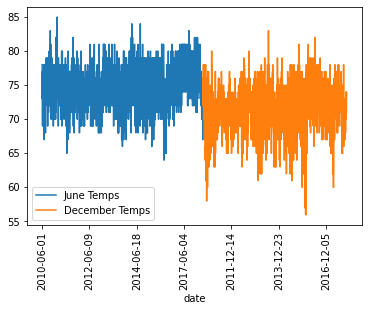

In [390]:
temps_Jun_Dec_df.plot()
plt.xticks(rotation=90)
# Turn off tick labels
# plt.axis('off')

In [372]:
# 21.4389° N, 158.0001° W
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [373]:
columns = inspector.get_columns("station")
for column_name in columns:
    print(column_name["name"], column_name["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


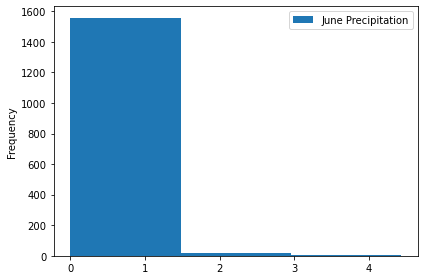

In [384]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
measurement_prcp_June = []
measurement_prcp_June = session.query(Measurement.date, Measurement.prcp).filter(func.extract('month', Measurement.date) == "06")
prcps_June = list(measurement_prcp_June)
prcps_June_df=pd.DataFrame(prcps_June, columns = ['date', 'June Precipitation'])
prcps_June_df.plot.hist(bins=3)
plt.tight_layout()

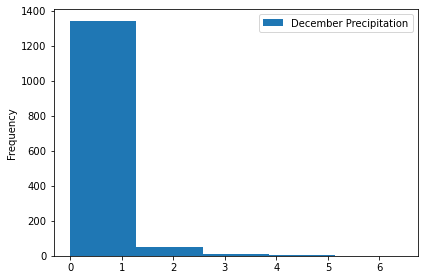

In [375]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
measurement_prcp_December = []
measurement_prcp_December = session.query(Measurement.date, Measurement.prcp).filter(func.extract('month', Measurement.date) == "12")
prcps_December = list(measurement_prcp_December)
prcps_December_df=pd.DataFrame(prcps_December, columns = ['date', 'December Precipitation'])
prcps_December_df.plot.hist(bins=5)
plt.tight_layout()

<AxesSubplot:>

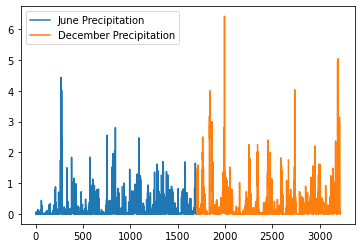

In [388]:
prcps_Jun_Dec_df.plot()

In [376]:
prcps_Jun_Dec_df = pd.merge(prcps_June_df, prcps_December_df, how="outer", on=["date", "date"])
prcps_Jun_Dec_df.describe()

,June Precipitation,December Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


<AxesSubplot:>

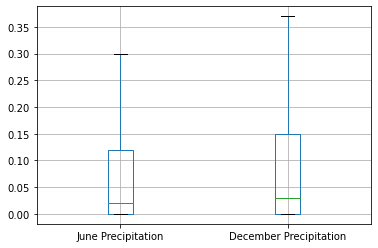

In [377]:
prcps_Jun_Dec_df.boxplot(column=['June Precipitation', 'December Precipitation'], sym='')

In [379]:
temps_prcps_Jun_Dec_df = pd.merge(temps_Jun_Dec_df, prcps_Jun_Dec_df, how="left", on=["date", "date"])